# Compare abrupt-4xCO2 with 2xCO2 and 0.5xCO2

In [78]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import my_functions as f
importlib.reload(f) # needed to load new changes in my_functions
import warnings
warnings.filterwarnings('ignore')

In [79]:
experiments = {}
directory = '../Processed_data/Global_annual_anomalies/'
model_names = [ f.name for f in os.scandir(directory) if f.is_dir() and f.name !='.ipynb_checkpoints']
model_names.sort()

for model in model_names:
    experiments[model] = {}
    modeldirectory = os.path.join(directory, model)
    modelexp_names = [ f.name for f in os.scandir(modeldirectory) if f.is_dir() and f.name !='.ipynb_checkpoints']
    for exp in modelexp_names:
        if exp in ['abrupt-2xCO2', 'abrupt-0p5xCO2']:
            experiments[model][exp] = f.find_members(model, exp)# members
    if bool(experiments[model]) == False: # delete element if empty
        del experiments[model]
experiments # prints all members of these exps
models = experiments.keys()


In [80]:
models

dict_keys(['CESM2', 'CNRM-CM6-1', 'CanESM5', 'GISS-E2-1-G', 'GISS-E2-1-H', 'GISS-E2-2-G', 'HadGEM3-GC31-LL', 'IPSL-CM6A-LR', 'MIROC6', 'MRI-ESM2-0'])

CESM2
CNRM-CM6-1
CanESM5
GISS-E2-1-G
GISS-E2-1-H
GISS-E2-2-G
HadGEM3-GC31-LL
IPSL-CM6A-LR
MIROC6
MRI-ESM2-0


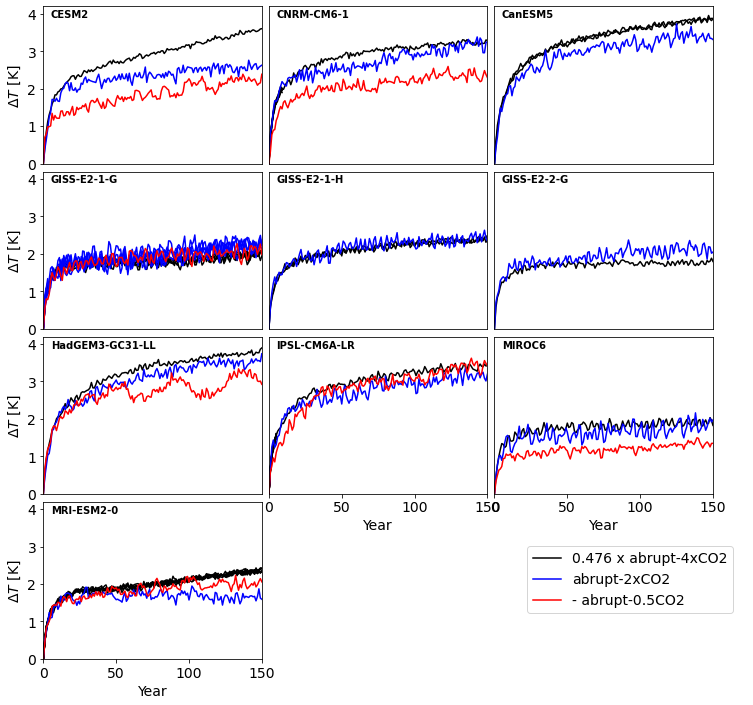

In [84]:
fig, axes = plt.subplots(ncols = 3, nrows = 4, figsize = (12,12))
axes = np.concatenate(axes)
years0 = np.arange(0,150+1)
npanels = len(models)
colors = ['black', 'blue', 'red']
labels = ['0.476 x abrupt-4xCO2', 'abrupt-2xCO2', '- abrupt-0.5CO2']

for (j, model) in enumerate(models):
    print(model)
    ax = axes[j]
    # define x-label:
    if j in [7, 8, 9]:
        ax.set_xlabel('Year', fontsize = 14)
    else: 
        ax.axes.xaxis.set_visible(False)
    if j in [0, 3, 6, 9]:
        ax.set_ylabel('$\Delta T$ [K]', fontsize = 14)
    else:
        ax.axes.yaxis.set_visible(False)
    #if j in [8,9]:
    #    ax.set_xlabel('Year', fontsize = 14)
    #if j in [0,2,4,6,8]:
    #    ax.set_ylabel('$\Delta T$ [K]', fontsize = 14)
    ax.tick_params(axis='both', labelsize = 14)
    #ax.set_title(model, fontweight = 'bold')
    ax.text(5, 3.9, model, fontweight = 'bold')
    ax.set_xlim(0,150)
    ax.set_ylim(0,4.2);
    
    modeldirectory = os.path.join(directory, model)
    modelexp_names = [ f.name for f in os.scandir(modeldirectory) if f.is_dir() and f.name !='.ipynb_checkpoints']
    
    for (k, exp) in enumerate(['abrupt-4xCO2', 'abrupt-2xCO2', 'abrupt-0p5xCO2']):
        if exp in modelexp_names:
            members = f.find_members(model, exp)
            if exp == 'abrupt-4xCO2' and model == 'GISS-E2-1-G':
                members.remove('r1i1p1f3')
            for member in members:
                data = f.load_anom(model, exp, member, length_restriction = 150)
                deltaT0 = np.concatenate([[0],data['tas']])
                if exp == 'abrupt-4xCO2':
                    deltaT0 *= 0.476
                elif exp == 'abrupt-0p5xCO2':
                    deltaT0 *= -1
                if j == 0:
                    ax.plot(years0[:len(deltaT0)], deltaT0, color = colors[k], label = labels[k])
                    #ax.legend()
                else:
                    ax.plot(years0[:len(deltaT0)], deltaT0, color = colors[k])

fig.delaxes(axes[-1]); fig.delaxes(axes[-2]);             
plt.subplots_adjust(hspace=0.05, wspace = 0.0325)
fig.legend(loc = (0.7,0.13), fontsize = 14)
#plt.savefig('../Figures/abruptCO2exp_comparison.pdf', format='pdf', dpi=600, bbox_inches="tight")
    